# Análise de Produção e Consumo de Energias Renováveis no Mundo 


## Introdução ao Cenário Energético Atual

O uso de energias renováveis em substituição a fontes de energia poluentes para suprir a demanda de energia elétrica no mundo está em rápida ascensão. Nas últimas décadas, a preocupação com os impactos ambientais tem sido pauta de importantes discussões políticas a nível mundial. Em 2023, na conferência sobre mudanças climáticas COP28 em Dubai, mais de 130 governos nacionais, incluindo a União Europeia, acordaram em trabalhar juntos para aumentar a capacidade de energia renovável instalada no mundo para pelo menos 11.000 GW até 2030 (fonte: "Renewables 2023: Analysis and forecasts to 2028", IEA, 2023). Portanto, analisar o crescimento da geração e consumo de energias renováveis no mundo, principalmente em países com maiores índices de poluição e demanda de energia elétrica, é de suma importância para se avaliar a situação atual e fazer previsões de cenários futuros.

Ásia, América do Norte e Europa são os continentes com maior índice de emissão de gases poluentes, enquanto que América do Sul e África se encontram entre os menos poluentes (fonte: https://globalcarbonatlas.org/). Essas regiões também incluem os países com maiores demandas de energia elétrica do mundo (fonte: "Electricity Market Report Update: Outlook for 2023 and 2024", IEA, 2023).

## Apresentação do Projeto

Neste Jupyter Notebook será apresentada uma análise do dataset "Renewable Energy World Wide : 1965~2022" disponível no link: https://www.kaggle.com/datasets/belayethossainds/renewable-energy-world-wide-19652022/data. A análise consiste no uso das principais bibliotecas de Python para verificar questões como o crescimento do uso de energia renovável nos últimos anos, o aumento do consumo de energia renovável, quais as fontes de energia renovável vem sendo mais utilizadas, entre outros. 

In [103]:
# Versão Python utilizada

from platform import python_version
print("Versão Python utilizada neste Jupyter Notebook:", python_version())

Versão Python utilizada neste Jupyter Notebook: 3.9.13


In [104]:
import warnings
warnings.filterwarnings('ignore')

In [105]:
# Importando bibliotecas necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

In [106]:
# Carregando o dataset

df_share_energy = pd.read_csv('./renewable-share-energy.csv')
df_consumption = pd.read_csv('./modern-renewable-energy-consumption.csv')

In [107]:
# Reconhecendo e explorando cada dataframe

df_share_energy

,Entity,Code,Year,Renewables (% equivalent primary energy)
0,Africa,NaN,1965,5.747495
1,Africa,NaN,1966,6.122062
2,Africa,NaN,1967,6.325731
3,Africa,NaN,1968,7.005293
4,Africa,NaN,1969,7.956088
...,...,...,...,...
5598,World,OWID_WRL,2017,11.355979
5599,World,OWID_WRL,2018,11.741059
5600,World,OWID_WRL,2019,12.237987
5601,World,OWID_WRL,2020,13.455194


In [108]:
df_consumption

,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
0,Africa,NaN,1971,0.16400,0.00000,0.0000,26.013390
1,Africa,NaN,1972,0.16500,0.00000,0.0000,29.633196
2,Africa,NaN,1973,0.17000,0.00000,0.0000,31.345707
3,Africa,NaN,1974,0.17500,0.00000,0.0000,35.667076
4,Africa,NaN,1975,0.17200,0.00000,0.0000,37.717968
...,...,...,...,...,...,...,...
5605,World,OWID_WRL,2017,596.42050,445.46628,1140.3931,4069.982700
5606,World,OWID_WRL,2018,643.03204,576.23090,1269.9792,4183.166500
5607,World,OWID_WRL,2019,674.74536,703.94977,1420.5441,4231.377000
5608,World,OWID_WRL,2020,703.91644,846.22940,1596.4282,4345.990000


### Limpeza dos dados

As tabelas possuem as colunas "Entity", "Code" e "Year" em comum. Contudo, a coluna "Code" não tem utilidade nesta análise, pois apresenta apenas um código de três letras para cada país, e, por isso, será excluída.

In [109]:
# Excluindo a coluna "Code" de todas as tabelas

dfs = [df_share_energy, df_consumption]

delete = 'Code'

for df in dfs:
    if delete in df.columns:
        df.drop(columns=[delete], inplace=True)


In [110]:
# Verificando o tipo de dado de cada coluna

df_share_energy.dtypes

Entity                                       object
Year                                          int64
Renewables (% equivalent primary energy)    float64
dtype: object

In [111]:
df_consumption.dtypes

Entity                      object
Year                         int64
Geo Biomass Other - TWh    float64
Solar Generation - TWh     float64
Wind Generation - TWh      float64
Hydro Generation - TWh     float64
dtype: object

In [112]:
# Verificando se há registros duplicados

df_share_energy.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5598    False
5599    False
5600    False
5601    False
5602    False
Length: 5603, dtype: bool

In [113]:
df_consumption.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5605    False
5606    False
5607    False
5608    False
5609    False
Length: 5610, dtype: bool

In [114]:
# Verificando se há valores ausentes

df_share_energy.isna().sum()

Entity                                      0
Year                                        0
Renewables (% equivalent primary energy)    0
dtype: int64

In [115]:
df_consumption.isna().sum()

Entity                       0
Year                         0
Geo Biomass Other - TWh    144
Solar Generation - TWh     168
Wind Generation - TWh      165
Hydro Generation - TWh       7
dtype: int64

Os valores ausentes encontrados são esperados, visto que, a produção e o consumo de energia elétrica através de energias renováveis ainda hoje não é uma realidade em muitos países. Além disso, mesmo países que atualmente estão utilizando essas fontes podem ter iniciado essa utilização há poucas décadas atrás. Dessa forma, existem vários anos com porcentagens de geração e consumo não preenchidos devido os respectivos países não terem iniciado o uso de energias renováveis.

A melhor opção nesse caso é transformar esses valores em zeros.

In [116]:
# Convertendo valores ausentes

dfs_fillna = [df_share_energy.fillna(0, inplace=True), df_consumption.fillna(0, inplace=True)]

dfs_fillna

[None, None]

### Análise da Capacidade de Geração de Energia Elétrica a Partir de Fontes Renováveis de 2000 a 2022

A partir dos dataframes é possível tirar algumas conlusões a respeito da produção e capacidade instalada de energia elétrica proveniente de energias renováveis.

In [117]:
# Porcentagem de energia elétrica proveniente de fontes renováveis de 2000 a 2022

df_2000_2022 = df_share_energy[df_share_energy['Year'] > 1999]

percent = df_2000_2022.groupby(['Entity', 'Year'])['Renewables (% equivalent primary energy)'].sum()

percent = percent.to_frame().reset_index()
percent

,Entity,Year,Renewables (% equivalent primary energy)
0,Africa,2000,7.174941
1,Africa,2001,7.414131
2,Africa,2002,7.605162
3,Africa,2003,7.041176
4,Africa,2004,6.933374
...,...,...,...
2254,World,2017,11.355979
2255,World,2018,11.741059
2256,World,2019,12.237987
2257,World,2020,13.455194


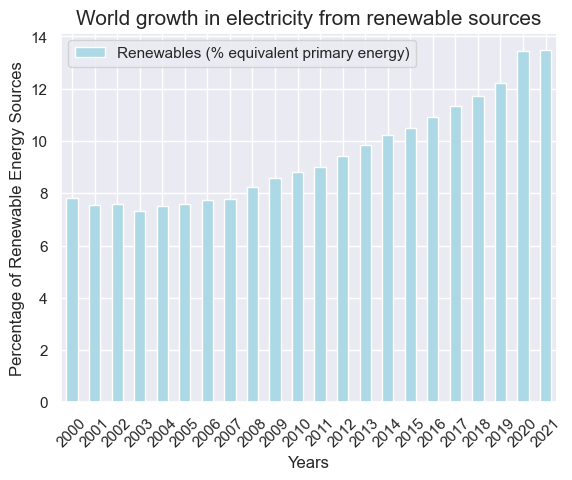

In [118]:
# Verificando o crescimento mundial de energia elétrica proveniente de fontes renováveis de 2000 a 2022

percent_world = percent[percent['Entity'] == 'World']

percent_world.plot.bar(x = "Year", y = "Renewables (% equivalent primary energy)", color = 'lightblue')
plt.xticks(rotation = 45)
plt.xlabel("Years")
plt.ylabel("Percentage of Renewable Energy Sources")
plt.title("World growth in electricity from renewable sources", fontsize = 15)
plt.show()

In [119]:
# Média do crescimento mundial

mean_percent_world = percent_world.groupby('Entity')['Renewables (% equivalent primary energy)'].mean()

mean_percent_world = mean_percent_world.to_frame().reset_index()
mean_percent_world

,Entity,Renewables (% equivalent primary energy)
0,World,9.486005


##### De 2000 a 2022 houve um crescimento médio de 9,48% no uso de fontes de energias renováveis para geração de energia elétrica no mundo.

In [120]:
# Verificando os países com maior crescimento do uso de fontes de energias renováveis

top_percent = df_2000_2022.groupby('Entity')['Renewables (% equivalent primary energy)'].mean()

top_percent = top_percent.to_frame().reset_index()

top_percent = top_percent.rename(columns={'Entity': 'Country', 'Renewables (% equivalent primary energy)': 'Renewable %(2000-2022)'})

top_10 = top_percent.sort_values(by='Renewable %(2000-2022)', ascending=False)
top_10.head(5)

,Country,Renewable %(2000-2022)
38,Iceland,77.788278
64,Norway,68.430445
12,Brazil,43.335757
86,Sweden,39.269407
59,New Zealand,36.896170


##### A Islândia foi o país que apresentou o maior crescimento médio no uso de fontes de energias renováveis para geração de energia elétrica entre 2000 e 2022. Seguida da Noruega, Brasil, Suécia e Nova Zelândia.
##### Nota-se que 4 dos cinco países listados são países de primeiro mundo. Enquanto o Brasil é o único país subdesenvolvido na lista, sendo, também, o país com maior dimensão territórial.

In [121]:
# Analisando as tecnologias utilizadas por esses países no mesmo período de tempo


# Filtrando o período e os países
df_tech_22 = df_consumption[df_consumption['Year'] > 1999]

top5 = ['Iceland', 'Norway', 'Brazil', 'Sweden', 'New Zealand']

df_tech_top5 = df_tech_22[df_tech_22['Entity'].isin(top5)]


# Agrupando pela média de geração de cada tecnologia por país

df_tech_gen = df_tech_top5.groupby(['Entity', 'Year']).agg({'Geo Biomass Other - TWh': 'mean', 
                                                            'Solar Generation - TWh': 'mean',
                                                            'Wind Generation - TWh' : 'mean',
                                                            'Hydro Generation - TWh': 'mean'
                                                           }).reset_index()
df_tech_gen

,Entity,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
0,Brazil,2000,7.855363,0.000,0.001000,304.403000
1,Brazil,2001,8.990407,0.000,0.034900,267.876000
2,Brazil,2002,10.226147,0.000,0.061000,286.092000
3,Brazil,2003,11.894463,0.000,0.061000,305.616000
4,Brazil,2004,12.475056,0.000,0.061000,320.796900
...,...,...,...,...,...,...
105,Sweden,2017,12.076000,0.230,17.609000,64.964000
106,Sweden,2018,11.913000,0.391,16.623000,62.050000
107,Sweden,2019,13.036000,0.663,19.847000,65.207000
108,Sweden,2020,11.177000,1.035,27.526000,72.141000


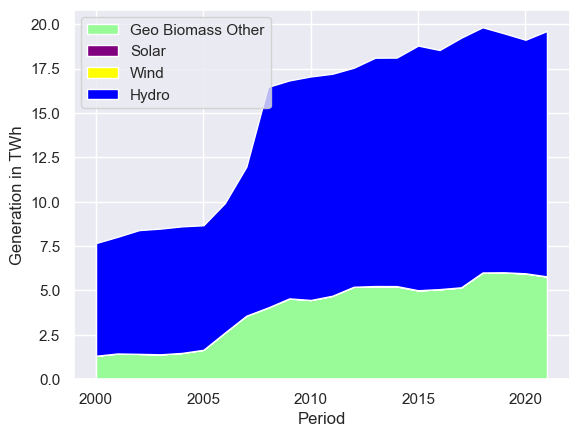

In [122]:
# Verificando graficamente a geração por tecnologia na Islandia

iceland_tech = df_tech_gen[df_tech_gen['Entity'] == 'Iceland']

color_map = ['palegreen', 'purple', 'yellow', 'blue']
    
# criando um gráfico de áreas preenchidas
plt.stackplot(iceland_tech['Year'], iceland_tech['Geo Biomass Other - TWh'], iceland_tech['Solar Generation - TWh'],
              iceland_tech['Wind Generation - TWh'],
              iceland_tech['Hydro Generation - TWh'],
              labels=['Geo Biomass Other', 'Solar', 'Wind', 'Hydro'],
              colors=color_map)

plt.legend(loc='upper left')
plt.xlabel('Period')
plt.ylabel('Generation in TWh')
plt.show()

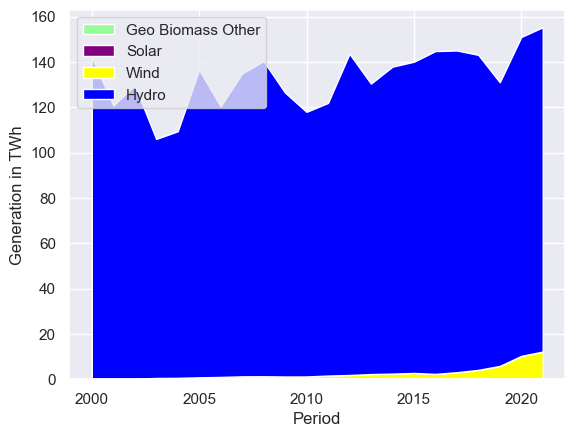

In [123]:
# Verificando graficamente a geração por tecnologia na Noruega

norway_tech = df_tech_gen[df_tech_gen['Entity'] == 'Norway']

color_map = ['palegreen', 'purple', 'yellow', 'blue']
    
# criando um gráfico de áreas preenchidas
plt.stackplot(norway_tech['Year'],norway_tech['Geo Biomass Other - TWh'],norway_tech['Solar Generation - TWh'],
              norway_tech['Wind Generation - TWh'],
              norway_tech['Hydro Generation - TWh'],
              labels=['Geo Biomass Other', 'Solar', 'Wind', 'Hydro'],
              colors=color_map)

plt.legend(loc='upper left')
plt.xlabel('Period')
plt.ylabel('Generation in TWh')
plt.show()

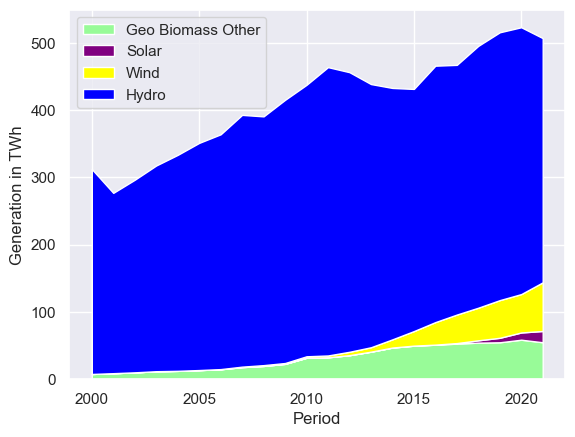

In [124]:
# Verificando graficamente a geração por tecnologia no Brazil 

brazil_tech = df_tech_gen[df_tech_gen['Entity'] == 'Brazil']

color_map = ['palegreen', 'purple', 'yellow', 'blue']
    
# criando um gráfico de áreas preenchidas
plt.stackplot(brazil_tech['Year'],brazil_tech['Geo Biomass Other - TWh'],brazil_tech['Solar Generation - TWh'],
              brazil_tech['Wind Generation - TWh'],
              brazil_tech['Hydro Generation - TWh'],
              labels=['Geo Biomass Other', 'Solar', 'Wind', 'Hydro'],
              colors=color_map)

plt.legend(loc='upper left')
plt.xlabel('Period')
plt.ylabel('Generation in TWh')
plt.show()

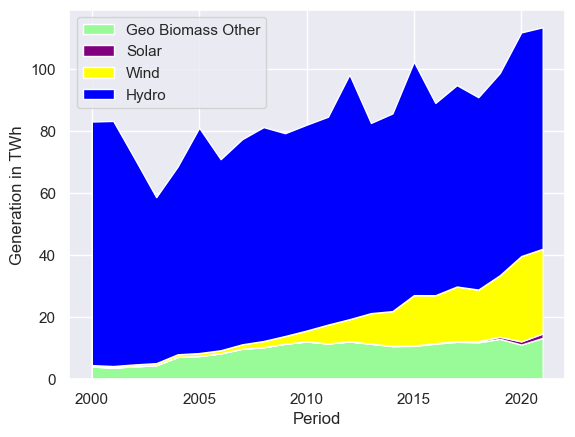

In [125]:
# Verificando graficamente a geração por tecnologia na Suécia

sweden_tech = df_tech_gen[df_tech_gen['Entity'] == 'Sweden']

color_map = ['palegreen', 'purple', 'yellow', 'blue']
    
# criando um gráfico de áreas preenchidas
plt.stackplot(sweden_tech['Year'], sweden_tech['Geo Biomass Other - TWh'], sweden_tech['Solar Generation - TWh'],
              sweden_tech['Wind Generation - TWh'],
              sweden_tech['Hydro Generation - TWh'],
              labels=['Geo Biomass Other', 'Solar', 'Wind', 'Hydro'],
              colors=color_map)

plt.legend(loc='upper left')
plt.xlabel('Period')
plt.ylabel('Generation in TWh')
plt.show()

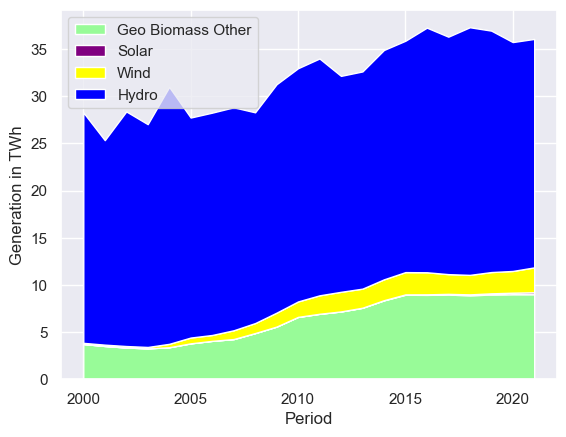

In [126]:
# Verificando graficamente a geração por tecnologia na Nova Zelândia

new_tech = df_tech_gen[df_tech_gen['Entity'] == 'New Zealand']

color_map = ['palegreen', 'purple', 'yellow', 'blue']
    
# criando um gráfico de áreas preenchidas
plt.stackplot(new_tech['Year'], new_tech['Geo Biomass Other - TWh'], new_tech['Solar Generation - TWh'],
              new_tech['Wind Generation - TWh'],
              new_tech['Hydro Generation - TWh'],
              labels=['Geo Biomass Other', 'Solar', 'Wind', 'Hydro'],
              colors=color_map)

plt.legend(loc='upper left')
plt.xlabel('Period')
plt.ylabel('Generation in TWh')
plt.show()

##### Os gráficos mostram o quanto a energia proveniente de hidrelétricas (Hydro) se matém em grande uso ao longo do tempo.
##### Energia eólica (Wind) apresentou um crescimento significante, principalmente nos últimos 12 anos cosiderados na análise, com exceção da Islândia, que demonstrou um maior crescimento de biomassa e outros (Geo Biomass Other).
##### Todos os gráficos mostraram que a geração de energia elétrica, de modo geral, está em crescimento contínuo. O que está de acordo com o aumento da demanda de energia elétrica, que acompanha o desenvolvimento tecnológico, o crescimento industrial e populacional.
##### Como já comentado na introdução deste projeto, a tendência é que a demanda continue crescendo, e que a geração de energia elétrica  a partir de fontes de energias renováveis supere a geração por fontes não renováveis. 